In [13]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import numpy as np
#from pynance import metrics

In [11]:
# --- Step 0: Load Data from CSV ---
# 🔁 Replace this with your actual file path
data_path = '../data/yfinance_data/AMZN_historical_data.csv'  
data = pd.read_csv(data_path, index_col='Date', parse_dates=True)

# Ensure required columns exist
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
if not all(col in data.columns for col in required_cols):
    raise ValueError(f"CSV file must include columns: {required_cols}")

data.dropna(inplace=True)

In [5]:
# --- Step 1: Compute TA-Lib Indicators ---

# Simple Moving Average
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)

# Relative Strength Index
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# MACD and Signal Line
macd, macd_signal, macd_hist = talib.MACD(
    data['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal

# --- Step 2: Print Last Rows of Indicators ---
print("\n📊 TA-Lib Indicators (Last 5 rows):")
display(data[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal']].tail().style.format("{:.2f}"))


📊 TA-Lib Indicators (Last 5 rows):


,Close,SMA_20,RSI,MACD,MACD_Signal
Date,,,,,
2024-07-24 00:00:00,180.83,192.89,37.22,-1.34,0.64
2024-07-25 00:00:00,179.85,192.20,36.13,-1.88,0.13
2024-07-26 00:00:00,182.50,191.43,41.15,-2.07,-0.31
2024-07-29 00:00:00,183.20,190.93,42.43,-2.13,-0.67
2024-07-30 00:00:00,181.71,190.16,40.41,-2.28,-0.99


In [6]:
# --- Step 3: Financial Metrics (Table Format) ---

returns = data['Close'].pct_change().dropna()

# Calculate metrics
volatility = returns.std() * np.sqrt(252)  # Annualized Volatility
sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)  # Annualized Sharpe Ratio

# Create DataFrame to display metrics
metrics_table = pd.DataFrame({
    'Metric': ['Annualized Volatility', 'Annualized Sharpe Ratio'],
    'Value': [volatility, sharpe_ratio]
})

# Display nicely
print("\n📈 Financial Metrics:")
display(metrics_table.style.format({'Value': '{:.4f}'}))


📈 Financial Metrics:


,Metric,Value
0,Annualized Volatility,0.5624
1,Annualized Sharpe Ratio,0.7688


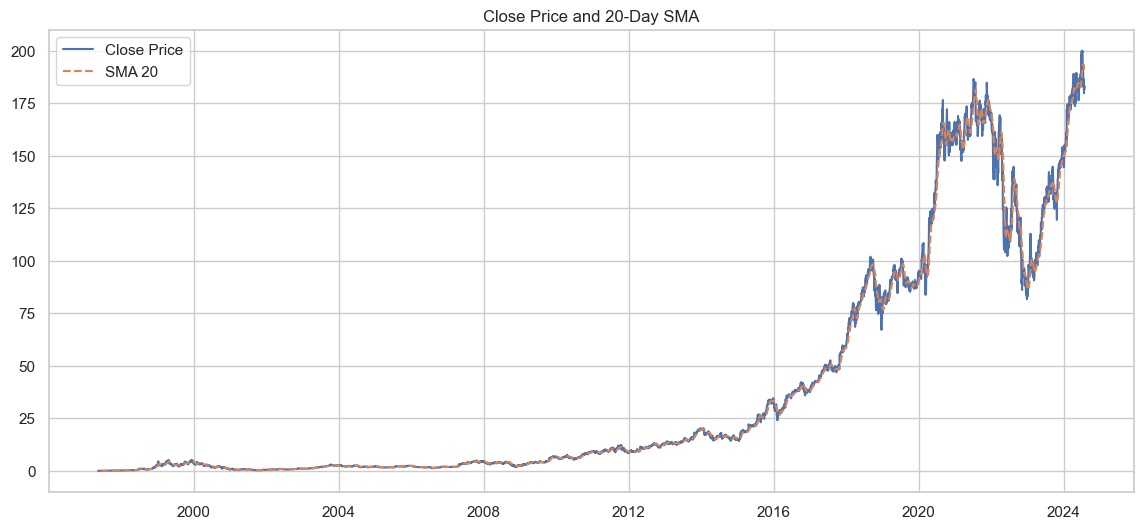

In [7]:
# --- Step 3: Visualizations ---
sns.set(style='whitegrid')
# 1. Close Price + SMA
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20', linestyle='--')
plt.title('Close Price and 20-Day SMA')
plt.legend()
plt.show()

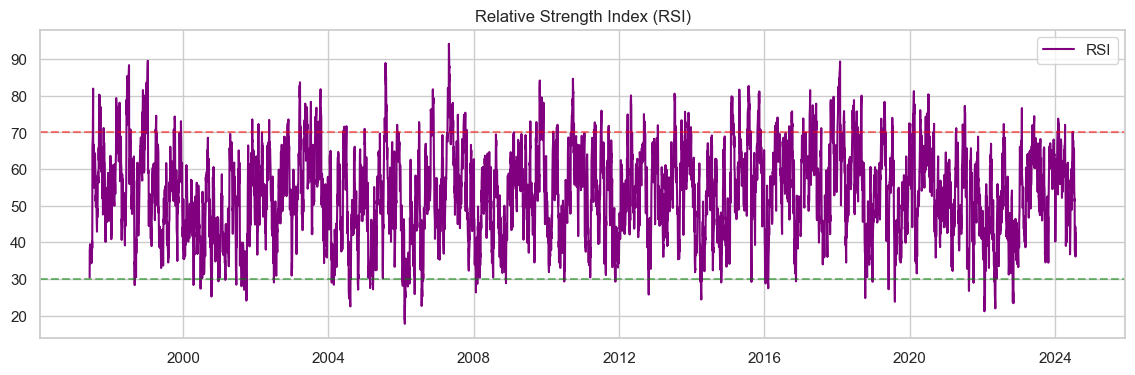

In [8]:
# 2. RSI Plot
plt.figure(figsize=(14, 4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

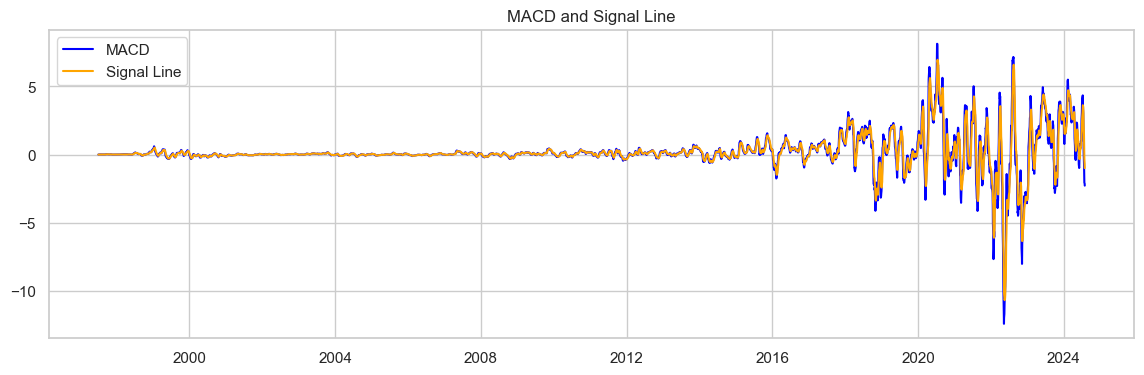

In [9]:
# 3. MACD Plot
plt.figure(figsize=(14, 4))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='Signal Line', color='orange')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()